In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('funda-amsterdam.csv')



In [33]:
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


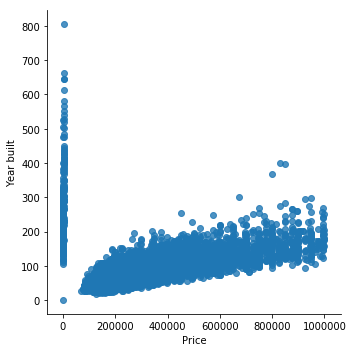

In [34]:
sns.lmplot(x='price', y='area', fit_reg=False, data=df) 
plt.xlabel('Price')
plt.ylabel('Year built')
plt.title('')
plt.show()

In [35]:
df = df[df['price']> 50000]

In [36]:
df_subset = df[['rooms', 'price',  'area']]

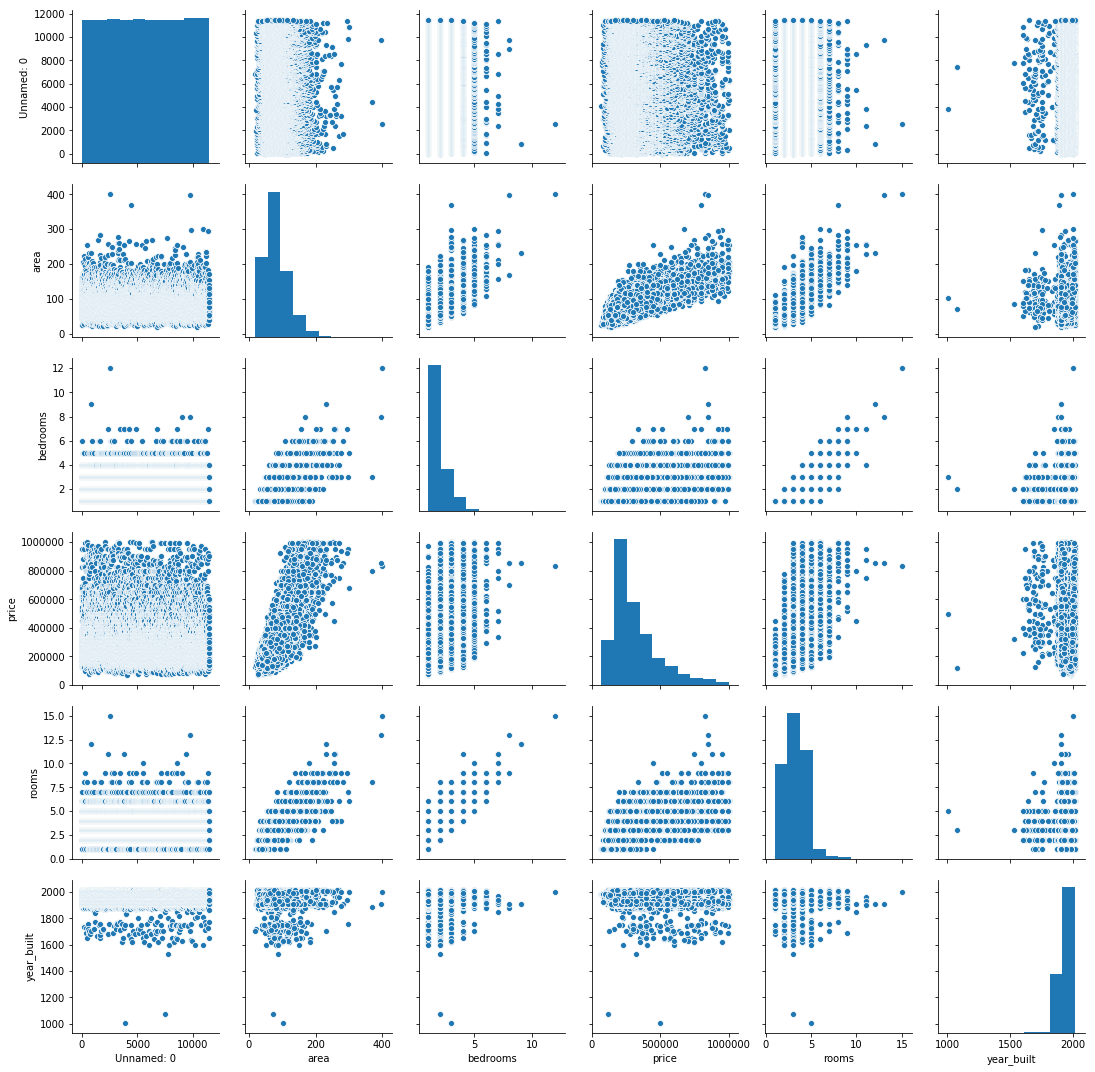

In [37]:
sns.pairplot(df)

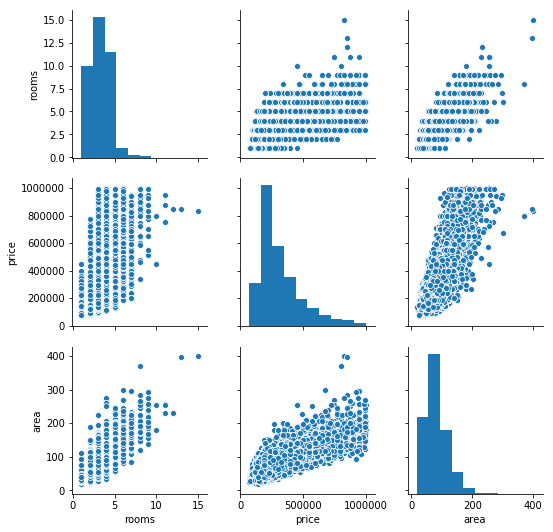

In [38]:
sns.pairplot(df_subset)

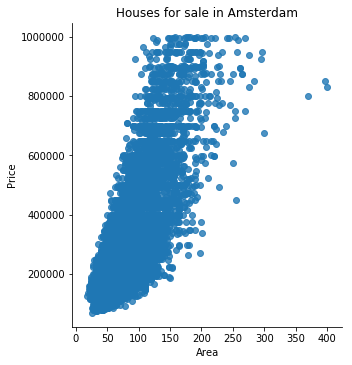

In [39]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset) 
plt.xlabel('Area') 
plt.ylabel('Price')
plt.title('Houses for sale in Amsterdam')
plt.show()

Mostly the following applies: The bigger the area is the higher the price of the house. There is a correlation between the area and the price

In [40]:
import scipy
scipy.stats.pearsonr(df['area'], df['price'])

(0.7250807666953685, 0.0)

C:\Users\koen1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


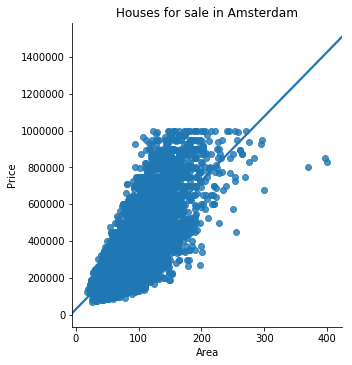

In [41]:
sns.lmplot(x='area', y='price', data=df_subset, ci=False) 
plt.xlabel('Area') 
plt.ylabel('Price')
plt.title('Houses for sale in Amsterdam')
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression


x = df_subset[['area']] 
y = df_subset['price']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.coef_[0] 
b1 = lm.intercept_ 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3498.81 + 27983.93X


In [43]:
df['price_p'] = lm.predict(x) 
df.head(10)



,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [44]:
x.mean()

area    82.654634
dtype: float64

In [45]:
y.mean()

317177.1504376861

In [46]:
house = df[df['address']=='Slichtenhorststraat 10']
house.head()
residual = house['price'] - house['price_p'] 


print(f"The house on Slichthenhorststraat was priced at {int(house['price'])}.")
print(f"The model predicted {int(house['price_p'])}.")
print(f"The residual is {int(residual)}")

The house on Slichthenhorststraat was priced at 234500.
The model predicted 426848.
The residual is -192348


In [47]:
df.rename( columns={'Unnamed: 0':'id'}, inplace=True )

In [48]:
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552


In [49]:
x = df[['area']] 
y = df['price'] 
lm = LinearRegression() 
lm.fit(x, y) 


df['resid'] = df['price_p'] - df['price'] 

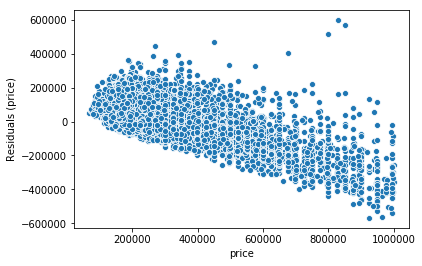

In [50]:
sns.scatterplot(x='price',y='resid',data=df)
plt.xlabel('price')
plt.ylabel('Residuals (price)')
plt.show()


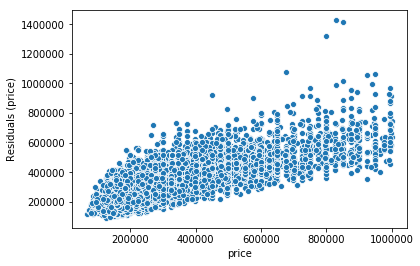

In [51]:
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlabel('price')
plt.ylabel('Residuals (price)')
plt.show()


In [52]:
from sklearn.metrics import r2_score

r2_score(df['price'], df['price_p'])

0.5257421182315432

In [53]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(df['price'], df['price_p']))

118016.87861535022

In [54]:
df['resid'] = df['price'] - df['price_p'] 

In [55]:
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,resid
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,-108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,-48409.234552


In [56]:
y = df['price'] 
X = df[['area', 'bedrooms', 'rooms']] 
X.index = df['id'] 
X.head()

,area,bedrooms,rooms
id,,,
0,108,2,3
1,47,1,2
2,116,2,3
3,58,2,3
4,63,1,3


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() #The train data

,area,bedrooms,rooms
id,,,
3116,72,2,3
9495,148,3,5
9147,139,3,4
2601,28,1,1
10502,59,2,3


In [58]:
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [59]:
y_p = lm.predict(X_test) 
r2_score(y_test, y_p)

0.544823948863015

In [60]:
math.sqrt(mean_squared_error(y_test, y_p))

116189.69669968517

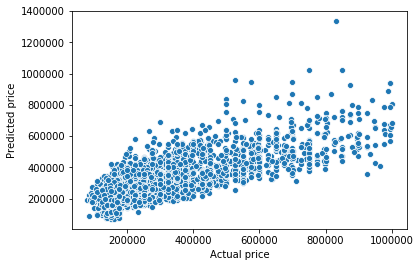

In [61]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()